## <center>Handwritten Digit Recognition (HDR) using Convolutional Neural Network (CNN) with Tensorflow </center>
<center> <b>A Deep Learning Analysis with Real World Data</b> </center> 

In [3]:
#import required libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#Load Train and Test dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Dimension of Train and Test Data

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [7]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [9]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

# Splitting data into train and validation set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1200)

In [14]:
#Dimension of train and validation data
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [15]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [16]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


# Explore the Data

In [17]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,121,19,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,252,242,134,28,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,252,252,252,115,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,158,240,252,198,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,25,110,...,0,213,252,198,0,0,0,0,0,0
9,0,0,0,0,0,0,0,51,197,252,...,98,242,238,87,0,0,0,0,0,0


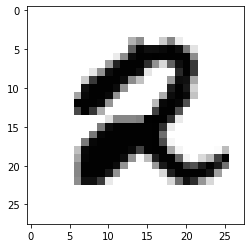

In [20]:
plt.imshow(x_train_re[0],cmap='binary')
plt.show()

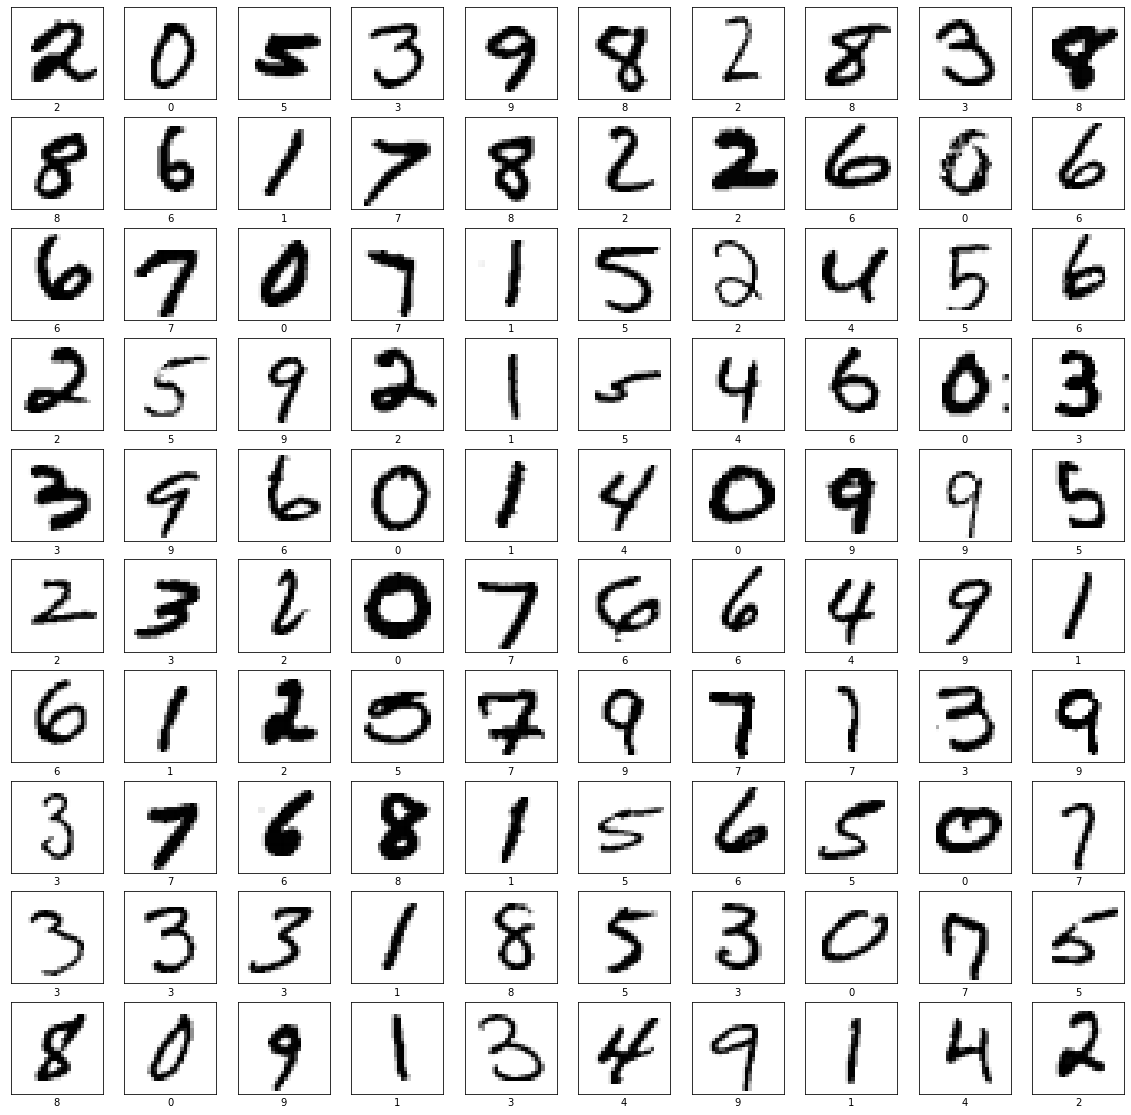

In [24]:
#Print 100 images in training data for visualization
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

# Reshaping training,test and validation data

In [25]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [26]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [27]:
#Normalizing the dataset values between range of  0 to 1 
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [29]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.94117647],
       [0.98823529],
       [0.98823529],
       [0.98823529],
       [0.95294118],
       [0.42352941],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.88627451],
       [0.98823529],
       [0.90588235],
       [0.17647059],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

# Build the CNN model to classify handwritten Digits

In [32]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,filters=8,strides=1,activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128,activation=tf.keras.activations.relu));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax,
kernel_initializer=tf.keras.initializers.VarianceScaling()))

In [34]:
#Training model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [36]:
#compile the model using Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer,loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

# Training the model

In [38]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 23s 21ms/step - loss: 0.2649 - accuracy: 0.9177 - val_loss: 0.0882 - val_accuracy: 0.9724
Epoch 2/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0921 - accuracy: 0.9715 - val_loss: 0.0533 - val_accuracy: 0.9843
Epoch 3/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0676 - accuracy: 0.9782 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 4/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0543 - val_accuracy: 0.9833
Epoch 5/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0431 - val_accuracy: 0.9871
Epoch 6/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 7/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0319 - accuracy: 0.9887 - val_loss: 0.0480 -

# Model Evaluation

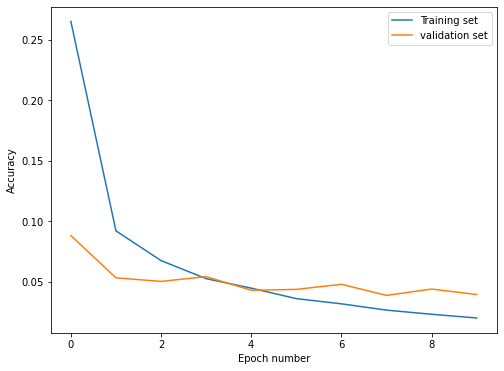

In [39]:
#Loss plot of training and validation
plt.figure(figsize=(8,6))
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'],label='Training set')
plt.plot(training_history.history['val_loss'],label='validation set')
plt.legend()

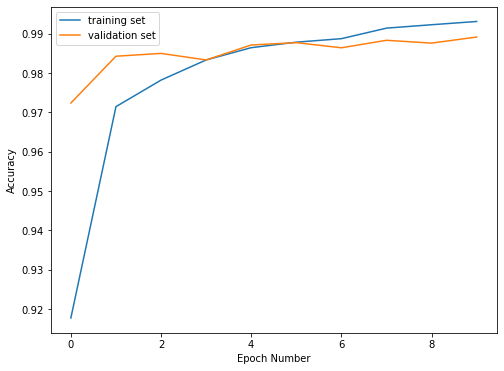

In [41]:
# Accuracy plot for training and validation
plt.figure(figsize=(8,6))
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()
plt.show()

# Model Accuracy

In [43]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [45]:
#Training Accuracy
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy*100)

Train loss:  0.009991921484470367
Train accuracy:  99.67559576034546


In [46]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [48]:
#Testing Accuracy
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy*100)

Validation loss:  0.03957061469554901
Validation accuracy:  98.91666769981384


# Save and load the model

In [49]:

model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [50]:
loaded_model = tf.keras.models.load_model(model_name)

# Visualise validation predicted data on how the digits were written

In [51]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.794655e-13,3.745863e-11,9.058244e-13,1.326412e-13,9.999999e-01,1.063032e-10,2.123070e-11,8.247628e-12,5.095622e-11,8.319265e-08
1,1.064719e-07,9.999987e-01,7.343691e-08,4.934893e-12,6.479403e-07,6.518011e-08,1.601175e-08,2.604745e-08,3.981663e-07,5.829214e-09
2,2.020794e-16,7.007703e-15,2.255825e-09,1.410271e-08,3.076588e-15,5.072328e-12,4.312627e-16,5.896670e-14,1.000000e+00,1.617803e-12
3,3.037579e-07,2.756410e-11,8.986589e-08,2.255039e-11,1.572719e-08,1.743715e-09,9.999995e-01,8.629629e-13,1.284991e-10,9.539025e-12
4,1.131999e-08,9.999772e-01,4.982150e-08,3.636888e-11,1.157554e-05,3.710486e-08,4.854594e-08,1.086050e-05,6.993202e-08,1.275208e-07
...,...,...,...,...,...,...,...,...,...,...
8395,5.887439e-09,9.999986e-01,1.049751e-06,7.823849e-12,1.920167e-07,1.957510e-08,3.399509e-08,1.585458e-07,1.816890e-08,5.186506e-10
8396,9.999896e-01,1.614615e-15,9.895205e-06,1.793249e-12,1.471872e-11,4.630832e-12,6.458033e-12,2.391973e-07,7.281894e-11,2.490023e-07
8397,8.451085e-06,6.184118e-08,7.709218e-08,6.610036e-08,6.170640e-04,1.368323e-06,9.993722e-01,4.314237e-09,3.440103e-08,6.640140e-07
8398,2.915303e-07,9.996449e-01,6.959205e-05,4.317489e-09,2.249090e-07,2.414189e-06,2.476741e-06,1.332602e-05,2.668349e-04,3.551666e-09


In [52]:
# extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,4
1,1
2,8
3,6
4,1
...,...
8395,1
8396,0
8397,6
8398,1


In [56]:
#print the first 5 images of validation set to see if model's prediction is correct.

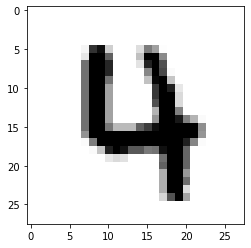

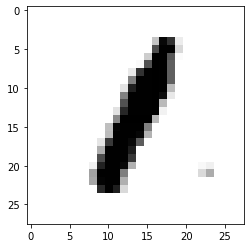

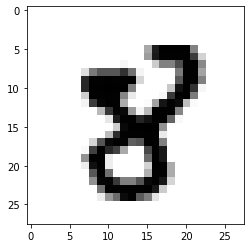

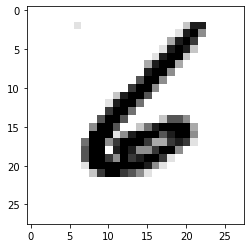

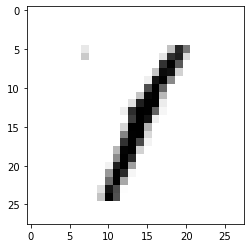

In [55]:
for i in range(5): 
    plt.imshow(x_validation_normalized[i].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
    plt.show()

We see that our model made a correct prediction and it successfully recognized digit 4. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

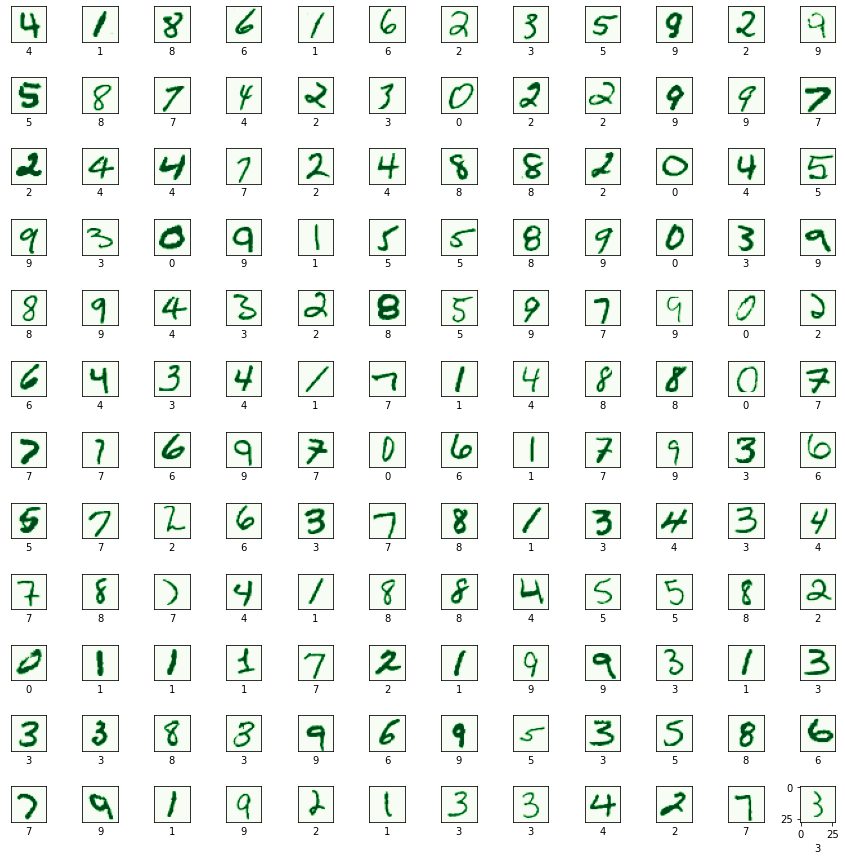

In [57]:
numbers_to_display = 144
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

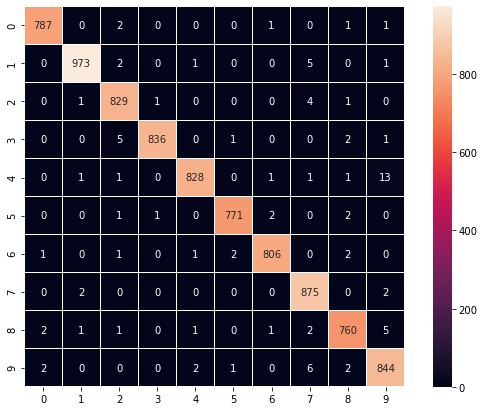

In [58]:
#Confusion matrix of validation dataset

confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(confusion_matrix,annot=True,linewidths=.5,fmt="d",square=True,ax=ax)
plt.show()

# Model Prediction on unseen data/ Test data

In [59]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (28000, 10)


In [60]:
#predicted probabilities of all digits
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.327418e-14,2.769657e-13,1.000000e+00,3.590897e-12,3.814420e-12,2.740165e-16,6.449909e-17,3.886755e-11,5.373572e-13,1.215010e-14
1,9.999976e-01,5.684059e-13,1.438156e-06,2.218698e-11,3.046883e-09,8.666050e-09,8.404215e-09,1.114362e-07,1.940017e-11,8.331119e-07
2,6.920563e-15,3.167598e-13,7.020289e-11,1.054119e-07,2.556644e-07,2.390593e-11,1.379259e-18,4.535357e-10,2.669266e-07,9.999994e-01
3,1.276845e-02,3.048967e-06,3.832463e-05,9.971188e-05,2.887101e-05,1.647562e-04,9.929122e-07,4.568470e-05,8.379291e-03,9.784709e-01
4,3.645577e-10,9.633575e-12,3.487054e-08,9.999998e-01,3.253011e-14,1.268526e-08,3.450511e-13,5.937899e-10,1.785848e-07,2.277403e-08
...,...,...,...,...,...,...,...,...,...,...
27995,3.230870e-14,2.743927e-15,1.414101e-13,1.505283e-09,1.272044e-06,2.564683e-09,6.270396e-17,1.959863e-08,2.507804e-07,9.999985e-01
27996,1.628273e-10,7.418258e-10,7.646200e-07,7.334079e-08,2.551478e-07,4.095501e-10,1.065753e-15,9.999955e-01,1.661645e-11,3.337396e-06
27997,1.378675e-19,7.706882e-16,2.941854e-16,1.000000e+00,1.874874e-20,2.436554e-12,3.545211e-24,1.721425e-14,3.577272e-16,2.428665e-13
27998,1.044172e-12,8.455431e-12,1.457593e-12,1.507830e-07,5.375287e-06,1.117905e-07,4.771267e-16,2.006437e-07,2.525283e-08,9.999942e-01


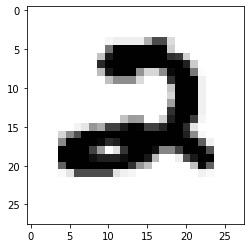

In [62]:
# actual first digit of test dataset
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [64]:
#predicted digits off test data from model
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


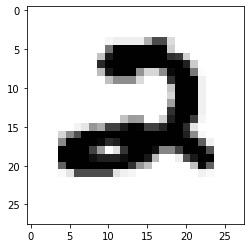

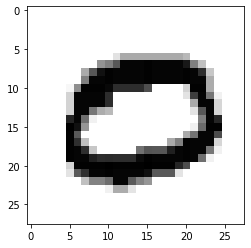

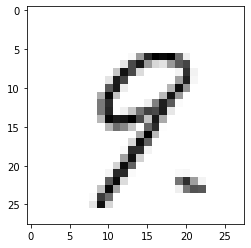

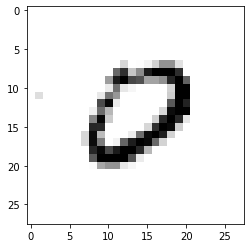

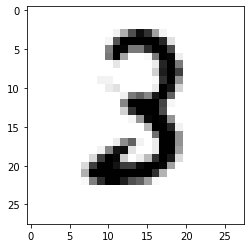

In [67]:
#visualising first five digits of test data
for i in range(5):
    plt.imshow(x_test_normalized[i].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
    plt.show()